# Assignment 1
## Applied Machine Learning (BUAN 6341)

### <font color='red'>Due Date: February 14, 2022 11:59pm</font> 

Deliverables:

- Submit your answers to conceptual questions (described in another .pdf file) in a pdf file.
- Write down your codes and discussions in the given cells described in this file.
    - Cells for coding are denoted as "YOUR CODE HERE" 
    - Cells for discussions are denoted as "YOUR DISCUSSIONS HERE". Include "#" before each line of your discussions to comment out your wordings (i.e., not considered as code).
    - If you need more cells to check temporary results, add a cell using the "+" button or shortcut "esc + b".
- Submit two files: .pdf and .ipynb to eLearning.


In [1]:
NAME = "Naga Madhulatha Ramabhotla"

### Meet the Data and the Setting

##### Background  
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles.

##### The Dataset

We will be using the daily version of the Capital Bikeshare System dataset from the UCI Machine Learning Repository. This data set contains information about the daily count of bike rental checkouts in Washington, D.C.’s bikeshare program between 2011 and 2012. It also includes information about the weather and seasonal/temporal features for that day (like whether it was a weekday).
- **day:** Day of the record (relative to day 1:2011-01-01)
- **season:** Season (1:spring, 2:summer, 3:fall, 4:winter)
- **weekday:** Day of the week (0=Sunday, 6=Saturday)
- **workingday:** If day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit:**<br>
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds
- **temp:** Normalized temperature in Celcius
- **windspeed:** Normalized wind speed
- **casual:** Count of checkouts by casual/non-registered users
- **registered:** Count of checkouts by registered users
- **cnt:** Total checkouts

##### Practice Prep
The cells below imports basic packages as well as the bike-sharing dataset. The original dataset is loaded as Pandas DataFrame, and is named as 'daily'. Run and read through the cells below to obtain a general understanding of the data.

In [2]:
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
daily = pd.read_csv("day.csv")
daily.head()

,day,season,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
0,1,1,6,0,2,0.344167,0.160446,331,654,985
1,2,1,0,0,2,0.363478,0.248539,131,670,801
2,3,1,1,1,1,0.196364,0.248309,120,1229,1349
3,4,1,2,1,1,0.200000,0.160296,108,1454,1562
4,5,1,3,1,1,0.226957,0.186900,82,1518,1600


In [4]:
print(daily.columns)

Index(['day', 'season', 'weekday', 'workingday', 'weathersit', 'temp',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')


**Question 1 : Data Exploration.** (12 points)

- Plot the daily count of bikes that were checked out by **casual/non-registered** users (y) against the temperature (x). 
- Set the color based on whether it is a working day. Set transparency to 0.7. 
- Include appropriate labels for x-axis and y-axis, and colorbar. *Hint: use plt.colorbar(ticks = [0,1]) to change the ticks.*
- What insights can you get?

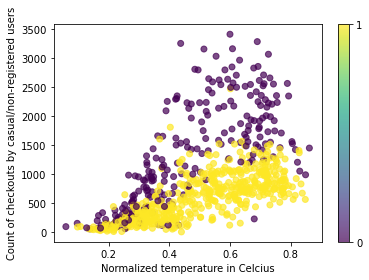

In [5]:
## YOUR CODE HERE ##

import matplotlib.cm as cm
a= daily['temp']
b= daily['casual']
category = daily['workingday']
plt.scatter(a, b, c= category, alpha = 0.7)
plt.ylabel("Count of checkouts by casual/non-registered users")
plt.xlabel("Normalized temperature in Celcius")
#plt.colorbar(sm)
plt.colorbar(ticks = [0,1])
#plt.set_label()
plt.show()

In [6]:
## YOUR DISCUSSION HERE ##
# Scatter plot is used since we want to plot 2 variables. Heatmap can also be used but it is generally used for multiple variables.
# For non-working days, as the temperature increases, count of checkouts by casual/non-registered users highly increases 
# in comparison to working days.
# For working days, as the temperature increases, count of checkouts by casual/non-registered users increases linearly but the 
# increase is low in comparison to non-working days

## Regression

In this section, you are supposed to complete TWO regression models, some in conjunction with grid search and CV. First, run the cells below to complete the data splitting step. 

In [7]:
# Define X and y
var = ['temp','windspeed','season', 'weekday', 'workingday', 'weathersit']
X = daily[var]
y = daily['cnt']

In [8]:
# Data splitting for training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Question 2: Linear Regression**

- Train a linear regression model. Report and specify clearly the estimated coefficients and intercept.   
  *Hint: use print("The intercept is:", INTERCEPT_RSLT) to specify the result reported is the intercept.*
- Obtain the predicted y for (1) test set and (2) training set. Store the results properly.
- Calculate and use print function to report (1) the MSE for test set and (2) the MSE for training set.
- We have obtained two MSE values. Which one should we report as the unbiased performance measure?
- Can you propose other potential measures for the model's performance? 
  *(Discussion only. No need to obtain the measure's value)*

In [9]:
# Train the model and report coefficients
# YOUR CODE HERE 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print("The coefficients are",lr.coef_)
print("The intercept is", lr.intercept_) 

The coefficients are [ 5245.48567189 -1995.73565252   412.66281476    76.77426589
   132.20982981  -800.60943777]
The intercept is 2093.4087280168706


In [10]:
## Predict y for training and test set
# YOUR CODE HERE
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
print(y_pred_test.shape)

(183,)


In [11]:
## Calculate and report the MSE for training and test
# YOUR CODE HERE
#MSE of test data
e1 = y_test - y_pred_test
## Square value
e1**2
## sum elements up - use np.sum()
SSR_test = np.sum(e1**2)
MSE_test = SSR_test/y_test.shape[0]
MSE_test
print("Mean squared error for test data is", MSE_test)

##MSE of train data
e2 = y_train - y_pred_train
##square value
(e2**2)
##
SSR_train = np.sum(e2**2)
MSE_train = SSR_train/y_train.shape[0]
MSE_train
print("Mean squared error for train data is",MSE_train)


Mean squared error for test data is 1816812.3742340659
Mean squared error for train data is 1852849.4373569072


In [12]:
## Discussion: Which is the unbiased performance measure? Can you propose other performance measures?

## Answer: The Unbiased performance measure would be MSE value of test data since we didn't use test data in training the model.
## Training data is used to train the model and hence cannot be used in measuring its performance.
## We can also use Mean Absolute Error and R squared value of Test data to evaluate the performance.

**Question 3: Polynomial Regression**

- Train a Polynomial regression model with grid search and 10-fold cross-validation. Let the grid of the hyperparameter be: [1,2,3]. Leave other parameters as default.
- Report the hyperparameter chosen (i.e., the degree selected) and the mean of validation score of the chosen model.
- Obtain the chosen model's unbiased performance (based on default measure, R-squared).

In [13]:
# Train the model, and report the results
# YOUR CODE HERE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

## Generate a new feature matrix consisting of all polynomial combinations of the features with 
## degree less than or equal to the specified degree

param_poly = {'polynomialfeatures__degree' :  range(1,4)  }  # python dictinonary 
poly_pipe = PolynomialFeatures()
lr_pipe = LinearRegression()
poly_auto = make_pipeline(poly_pipe, lr_pipe)


# GridSearchCV(Model, grids, CV = 10, scoring=R square value)
poly_grid = GridSearchCV(poly_auto, param_poly, cv = 10)
poly_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': range(1, 4)})

In [14]:
y_pred_test_poly = poly_grid.predict(X_test)

In [15]:
degree_selected = poly_grid.best_params_
print("Degree selected is", degree_selected)

Degree selected is {'polynomialfeatures__degree': 1}


In [16]:
CV_results = poly_grid.cv_results_
print(CV_results)## 0.46151791 is the mean validation score for polynomial degree 1

{'mean_fit_time': array([0.00230043, 0.00246725, 0.00155108]), 'std_fit_time': array([0.00045846, 0.00455745, 0.00465324]), 'mean_score_time': array([0.00090024, 0.0004003 , 0.00468915]), 'std_score_time': array([0.00030008, 0.00066383, 0.00716279]), 'param_polynomialfeatures__degree': masked_array(data=[1, 2, 3],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'polynomialfeatures__degree': 1}, {'polynomialfeatures__degree': 2}, {'polynomialfeatures__degree': 3}], 'split0_test_score': array([0.32614579, 0.49119184, 0.44880516]), 'split1_test_score': array([0.45295325, 0.62418979, 0.63896038]), 'split2_test_score': array([0.49771732, 0.37551737, 0.36366579]), 'split3_test_score': array([0.58621828, 0.32814127, 0.50914895]), 'split4_test_score': array([ 0.5542634 ,  0.472349  , -1.38220311]), 'split5_test_score': array([0.55797455, 0.57723853, 0.58565067]), 'split6_test_score': array([ 0.17226052, -0.72508916, -3.52470995]), 'split7_

In [17]:
Val_score = poly_grid.best_score_ 
print("The mean of validation score of the chosen model is", Val_score)

The mean of validation score of the chosen model is 0.46151790928788144


In [22]:
Rsquared_value = poly_grid.score(X_test, y_test)  # Here I used best_score_ in assignment submission- one needs to use score for 
## choosen model performance, best_score gives the mean validation score of the best model.
print("R squared value is", Rsquared_value) 
## This is the unbiased performance, MSE or MAE can also be used which are added below

R squared value is 0.5285823895780064


In [19]:
e = y_test - y_pred_test_poly
MSE_test = np.sum(e**2)/y_test.shape[0]
print("Mean squared error using grid search is",MSE_test)
## Note: This value is same as that of linear regression since the choosen degree is 1

Mean squared error using grid search is 1816812.3742340666


In [20]:
e = y_test - y_pred_test_poly
# absolute value
np.abs(e)
## sum elements up - use np.sum()
Sum_AE = np.sum(np.abs(e))
MAE_test = Sum_AE/y_test.shape[0]
print("Mean absolute error using grid search is",MAE_test)

Mean absolute error using grid search is 1152.443594591139


In [21]:
poly_grid.best_estimator_ 

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])